In [8]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

model_name = 'PCA_logreg'

## Data Preparation

In [2]:
# data preparation
f = h5py.File("Galaxy10_DECals.h5")
images = f.get("images")
labels = f.get("ans")
indices = list(range(0, len(images)))
imgs = np.array(images[indices])
lab = np.array(labels[indices])

In [4]:
# splitting data for test set
X = imgs
X = X.reshape(len(imgs), -1) 
y = lab

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=10)

## PCA

In [5]:
# PCA followed by logistic regression
pca = PCA(n_components=31)
X_train_pca = pca.fit_transform(scale(X_train))

log = LogisticRegression(max_iter=10000)
log.fit(X_train_pca, Y_train)

LogisticRegression(max_iter=10000)

#### Training Error

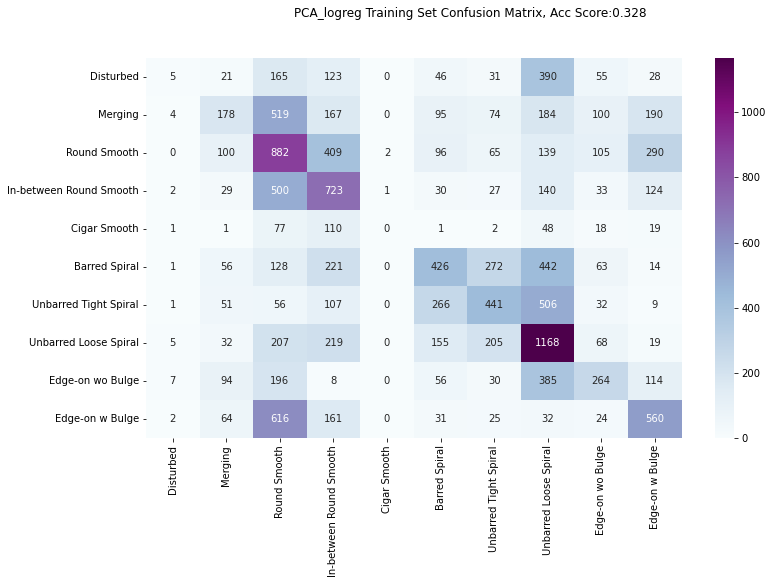

In [13]:
y_pred = log.predict(X_train_pca)
y_true = Y_train
    
# constant for classes
classes = ('Disturbed', 'Merging', 'Round Smooth', 'In-between Round Smooth', 'Cigar Smooth',
        'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on wo Bulge', 'Edge-on w Bulge')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
conf_plot = sns.heatmap(df_cm, cmap="BuPu", annot=True, fmt='g')
fig = conf_plot.get_figure()
acc_score = accuracy_score(y_true, y_pred)
fig.suptitle(f'{model_name} Training Set Confusion Matrix, Acc Score:{acc_score:>0.3f}')
fig.savefig(f'plots/{model_name}_conf_mat_training.png', bbox_inches='tight', dpi=500)

#### Validation Error

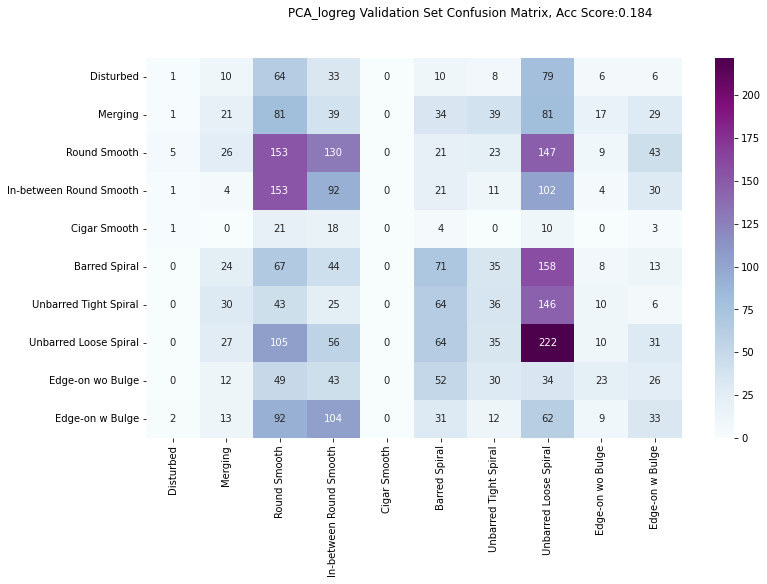

In [14]:
X_val_pca = pca.fit_transform(scale(X_val))
y_pred = log.predict(X_val_pca)
y_true = Y_val
    
# constant for classes
classes = ('Disturbed', 'Merging', 'Round Smooth', 'In-between Round Smooth', 'Cigar Smooth',
        'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on wo Bulge', 'Edge-on w Bulge')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
conf_plot = sns.heatmap(df_cm, cmap="BuPu", annot=True, fmt='g')
fig = conf_plot.get_figure()
acc_score = accuracy_score(y_true, y_pred)
fig.suptitle(f'{model_name} Validation Set Confusion Matrix, Acc Score:{acc_score:>0.3f}')
fig.savefig(f'plots/{model_name}_conf_mat_validation.png', bbox_inches='tight', dpi=500)

### 3.3

In [17]:
# select number of components

num_components = np.arange(1, 100, 10)

# Write your implementation below
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(scale(X_train))
X_val_pca = pca.fit_transform(scale(X_val))
scores = []

for n in num_components:
    print(n)
    log = LogisticRegression(max_iter=10000)
    log.fit(X_train_pca[:, :n], Y_train)    
    Y_val_pred = log.predict(X_val_pca[:, :n])
    acc = accuracy_score(y_true=Y_val, y_pred=Y_val_pred)
    
    scores.append(acc)

1
11
21
31
41
51
61
71
81
91


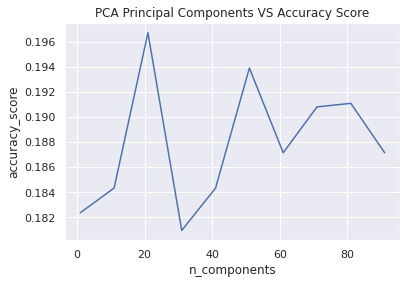

In [19]:
sns.set()
plt.plot(num_components, scores)
plt.xlabel('n_components')
plt.ylabel('accuracy_score')
plt.title('PCA Principal Components VS Accuracy Score')
plt.savefig('plots/PCA_acc_comp.png', dpi=400)